In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from itertools import combinations 
from sklearn import model_selection
import copy 
from statistics import mean,mode 
from itertools import combinations  


Using TensorFlow backend.
/home/sf/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sf/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sf/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sf/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtype

# BI-class

In [2]:
df=pd.read_csv('60s_window_wrist_chest.csv',index_col=0)
df=df[df['label']<2]

features=df.columns.tolist()
features

removed = ['label']
for rem in removed:
    features.remove(rem)

features_with_sub=[]
features_with_sub[:]=features
removed = ['subject']
for rem in removed:
    features.remove(rem)

feature=features
print(len(feature))
len(features_with_sub)

sm = SMOTE(random_state=2)
X, y= sm.fit_sample(df[features_with_sub], df['label'])
df_new=pd.concat([pd.DataFrame(X,columns=features_with_sub),pd.DataFrame(y,columns=['label'])],axis=1)
df_new

for i in range (len(list(df_new['subject']))):
    df_new['subject'][i] = min([2,3,4,5,6,7,8,9,10,11,13,14,15,16,17], key=lambda x:abs(x-df_new['subject'][i]))
df_new['subject']=df_new['subject'].astype(int)

p_d=pd.read_csv('personal_detail.csv',index_col=0)

df_new_1=df_new.merge(p_d,on='subject')
# df_new_1

sel_fea = ['EDA_tonic_mean','EDA_tonic_max','EDA_phasic_max','ECG_std']

70


/home/sf/.local/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [4]:

df_=pd.read_csv('2_class_combination_4-11.csv')
max_=df_['acc'].max()
min_=df_['acc'].min()

print(max_)
print(min_)
print(max_-min_)

train= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_train'][df_[df_['acc']==max_].index[0]]))]
test= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_test'][df_[df_['acc']==max_].index[0]]))]

scaler = Normalizer()
scaled_data_train = scaler.fit_transform(train[sel_fea])
scaled_data_test = scaler.transform(test[sel_fea])

clf = ExtraTreesClassifier(n_estimators=100,n_jobs=10)
clf.fit(scaled_data_train,train['label'])
y_pred=clf.predict(scaled_data_test)
#print (classification_report(test['label'],y_pred))
print(classification_report(test['label'],y_pred))




df_=pd.read_csv('/home/sf/fresh_start/Random_Forest/2_class_combination_4-11.csv')
max_=df_['acc'].max()
min_=df_['acc'].min()

print(max_)
print(min_)
print(max_-min_)

train= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_train'][df_[df_['acc']==max_].index[0]]))]
test= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_test'][df_[df_['acc']==max_].index[0]]))]

scaler = Normalizer()
scaled_data_train = scaler.fit_transform(train[sel_fea])
scaled_data_test = scaler.transform(test[sel_fea])

clf = RandomForestClassifier(n_estimators=100)
clf.fit(scaled_data_train,train['label'])
y_pred=clf.predict(scaled_data_test)
#print (classification_report(test['label'],y_pred))
print(classification_report(test['label'],y_pred))


0.9192825112107624
0.7713675213675214
0.14791498984324103
4 11 2_class
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       228
           1       0.92      0.89      0.91       218

    accuracy                           0.91       446
   macro avg       0.91      0.91      0.91       446
weighted avg       0.91      0.91      0.91       446

0.9247787610619468
0.7553648068669528
0.16941395419499394
4 11 2_class
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       229
           1       0.91      0.92      0.92       223

    accuracy                           0.92       452
   macro avg       0.92      0.92      0.92       452
weighted avg       0.92      0.92      0.92       452



In [5]:

df_=pd.read_csv('2_class_combination_5-10.csv')
max_=df_['acc'].max()
min_=df_['acc'].min()

print(max_)
print(min_)
print(max_-min_)

train= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_train'][df_[df_['acc']==max_].index[0]]))]
test= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_test'][df_[df_['acc']==max_].index[0]]))]

scaler = Normalizer()
scaled_data_train = scaler.fit_transform(train[sel_fea])
scaled_data_test = scaler.transform(test[sel_fea])

clf = ExtraTreesClassifier(n_estimators=100,n_jobs=10)
clf.fit(scaled_data_train,train['label'])
y_pred=clf.predict(scaled_data_test)
#print (classification_report(test['label'],y_pred))
print(classification_report(test['label'],y_pred))




df_=pd.read_csv('/home/sf/fresh_start/Random_Forest/2_class_combination_5-10.csv')
max_=df_['acc'].max()
min_=df_['acc'].min()

print(max_)
print(min_)
print(max_-min_)

train= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_train'][df_[df_['acc']==max_].index[0]]))]
test= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_test'][df_[df_['acc']==max_].index[0]]))]

scaler = Normalizer()
scaled_data_train = scaler.fit_transform(train[sel_fea])
scaled_data_test = scaler.transform(test[sel_fea])

clf = RandomForestClassifier(n_estimators=100)
clf.fit(scaled_data_train,train['label'])
y_pred=clf.predict(scaled_data_test)
#print (classification_report(test['label'],y_pred))
print(classification_report(test['label'],y_pred))


0.936117936117936
0.7453271028037384
0.19079083331419766
4 11 2_class
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       207
           1       0.94      0.92      0.93       200

    accuracy                           0.93       407
   macro avg       0.93      0.93      0.93       407
weighted avg       0.93      0.93      0.93       407

0.9292682926829268
0.7565011820330969
0.17276711064982986
4 11 2_class
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       208
           1       0.93      0.92      0.92       202

    accuracy                           0.92       410
   macro avg       0.92      0.92      0.92       410
weighted avg       0.92      0.92      0.92       410



In [11]:

df_=pd.read_csv('2_class_combination_6-9.csv')
max_=df_['acc'].max()
min_=df_['acc'].min()

print(max_)
print(min_)
print(max_-min_)

train= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_train'][df_[df_['acc']==max_].index[0]]))]
test= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_test'][df_[df_['acc']==max_].index[0]]))]

scaler = Normalizer()
scaled_data_train = scaler.fit_transform(train[sel_fea])
scaled_data_test = scaler.transform(test[sel_fea])

clf = ExtraTreesClassifier(n_estimators=100,n_jobs=10)
clf.fit(scaled_data_train,train['label'])
y_pred=clf.predict(scaled_data_test)
#print (classification_report(test['label'],y_pred))
print(classification_report(test['label'],y_pred))




df_=pd.read_csv('/home/sf/fresh_start/Random_Forest/2_class_combination_6-9.csv')
max_=df_['acc'].max()
min_=df_['acc'].min()

print(max_)
print(min_)
print(max_-min_)

train= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_train'][df_[df_['acc']==max_].index[0]]))]
test= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_test'][df_[df_['acc']==max_].index[0]]))]

scaler = Normalizer()
scaled_data_train = scaler.fit_transform(train[sel_fea])
scaled_data_test = scaler.transform(test[sel_fea])

clf = RandomForestClassifier(n_estimators=100)
clf.fit(scaled_data_train,train['label'])
y_pred=clf.predict(scaled_data_test)
#print (classification_report(test['label'],y_pred))
print(classification_report(test['label'],y_pred))


0.9455040871934604
0.7352185089974294
0.210285578196031
4 11 2_class
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       186
           1       0.93      0.94      0.94       181

    accuracy                           0.94       367
   macro avg       0.94      0.94      0.94       367
weighted avg       0.94      0.94      0.94       367

0.9487870619946092
0.7377892030848329
0.2109978589097763
4 11 2_class
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       187
           1       0.95      0.96      0.95       184

    accuracy                           0.95       371
   macro avg       0.95      0.95      0.95       371
weighted avg       0.95      0.95      0.95       371



In [13]:

df_=pd.read_csv('2_class_combination_7-8.csv')
max_=df_['acc'].max()
min_=df_['acc'].min()

print(max_)
print(min_)
print(max_-min_)

train= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_train'][df_[df_['acc']==max_].index[0]]))]
test= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_test'][df_[df_['acc']==max_].index[0]]))]

scaler = Normalizer()
scaled_data_train = scaler.fit_transform(train[sel_fea])
scaled_data_test = scaler.transform(test[sel_fea])

clf = ExtraTreesClassifier(n_estimators=100,n_jobs=10)
clf.fit(scaled_data_train,train['label'])
y_pred=clf.predict(scaled_data_test)
#print (classification_report(test['label'],y_pred))
print(classification_report(test['label'],y_pred))




df_=pd.read_csv('/home/sf/fresh_start/Random_Forest/2_class_combination_7-8.csv')
max_=df_['acc'].max()
min_=df_['acc'].min()

print(max_)
print(min_)
print(max_-min_)

train= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_train'][df_[df_['acc']==max_].index[0]]))]
test= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_test'][df_[df_['acc']==max_].index[0]]))]

scaler = Normalizer()
scaled_data_train = scaler.fit_transform(train[sel_fea])
scaled_data_test = scaler.transform(test[sel_fea])

clf = RandomForestClassifier(n_estimators=100)
clf.fit(scaled_data_train,train['label'])
y_pred=clf.predict(scaled_data_test)
#print (classification_report(test['label'],y_pred))
print(classification_report(test['label'],y_pred))


0.9577039274924471
0.7393767705382436
0.21832715695420357
4 11 2_class
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       166
           1       0.95      0.96      0.95       165

    accuracy                           0.95       331
   macro avg       0.95      0.95      0.95       331
weighted avg       0.95      0.95      0.95       331

0.95625
0.7175792507204611
0.2386707492795389
4 11 2_class
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       166
           1       0.95      0.95      0.95       154

    accuracy                           0.95       320
   macro avg       0.95      0.95      0.95       320
weighted avg       0.95      0.95      0.95       320



# Tri class

In [14]:
df=pd.read_csv('60s_window_wrist_chest.csv',index_col=0)
df=df[df['label']<3]

features=df.columns.tolist()
features

removed = ['label']
for rem in removed:
    features.remove(rem)

features_with_sub=[]
features_with_sub[:]=features
removed = ['subject']
for rem in removed:
    features.remove(rem)

feature=features
print(len(feature))
len(features_with_sub)

sm = SMOTE(random_state=2)
X, y= sm.fit_sample(df[features_with_sub], df['label'])
df_new=pd.concat([pd.DataFrame(X,columns=features_with_sub),pd.DataFrame(y,columns=['label'])],axis=1)
df_new

for i in range (len(list(df_new['subject']))):
    df_new['subject'][i] = min([2,3,4,5,6,7,8,9,10,11,13,14,15,16,17], key=lambda x:abs(x-df_new['subject'][i]))
df_new['subject']=df_new['subject'].astype(int)

p_d=pd.read_csv('personal_detail.csv',index_col=0)

df_new_1=df_new.merge(p_d,on='subject')
# df_new_1

sel_fea=['EDA_tonic_mean',
 'EDA_tonic_max',
 'EDA_tonic_min',
 'EDA_phasic_mean',
 'EDA_smna_mean',
 'EDA_phasic_min',
 'EMG_std',
 'c_ACC_y_min',
 'sport_today_YES',
 'ECG_std',
 'c_ACC_x_std',
 'c_ACC_y_std']

70


/home/sf/.local/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [55]:

df_=pd.read_csv('3_class_combination_4-11.csv')
max_=df_['acc'].max()
min_=df_['acc'].min()

print(max_)
print(min_)
print(max_-min_)

train= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_train'][df_[df_['acc']==max_].index[0]]))]
test= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_test'][df_[df_['acc']==max_].index[0]]))]

scaler = Normalizer()
scaled_data_train = scaler.fit_transform(train[sel_fea])
scaled_data_test = scaler.transform(test[sel_fea])

clf = ExtraTreesClassifier(n_estimators=100,n_jobs=10)
clf.fit(scaled_data_train,train['label'])
y_pred=clf.predict(scaled_data_test)
#print (classification_report(test['label'],y_pred))
print(classification_report(test['label'],y_pred))




df_=pd.read_csv('/home/sf/fresh_start/Random_Forest/3_class_combination_4-11.csv')
max_=df_['acc'].max()
min_=df_['acc'].min()

print(max_)
print(min_)
print(max_-min_)

train= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_train'][df_[df_['acc']==max_].index[0]]))]
test= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_test'][df_[df_['acc']==max_].index[0]]))]

scaler = Normalizer()
scaled_data_train = scaler.fit_transform(train[sel_fea])
scaled_data_test = scaler.transform(test[sel_fea])

clf = RandomForestClassifier(n_estimators=100)
clf.fit(scaled_data_train,train['label'])
y_pred=clf.predict(scaled_data_test)
#print (classification_report(test['label'],y_pred))
print(classification_report(test['label'],y_pred))


0.8051359516616314
0.4206798866855524
0.38445606497607904
              precision    recall  f1-score   support

           0       0.79      0.61      0.69       228
           1       0.84      0.92      0.88       222
           2       0.76      0.87      0.81       212

    accuracy                           0.80       662
   macro avg       0.80      0.80      0.79       662
weighted avg       0.80      0.80      0.79       662

0.7870090634441088
0.5385735080058224
0.24843555543828644
              precision    recall  f1-score   support

           0       0.77      0.64      0.70       228
           1       0.87      0.89      0.88       222
           2       0.74      0.85      0.80       212

    accuracy                           0.79       662
   macro avg       0.79      0.80      0.79       662
weighted avg       0.79      0.79      0.79       662



In [56]:

df_=pd.read_csv('3_class_combination_5-10.csv')
max_=df_['acc'].max()
min_=df_['acc'].min()

print(max_)
print(min_)
print(max_-min_)

train= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_train'][df_[df_['acc']==max_].index[0]]))]
test= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_test'][df_[df_['acc']==max_].index[0]]))]

scaler = Normalizer()
scaled_data_train = scaler.fit_transform(train[sel_fea])
scaled_data_test = scaler.transform(test[sel_fea])

clf = ExtraTreesClassifier(n_estimators=100,n_jobs=10)
clf.fit(scaled_data_train,train['label'])
y_pred=clf.predict(scaled_data_test)
#print (classification_report(test['label'],y_pred))
print(classification_report(test['label'],y_pred))




df_=pd.read_csv('/home/sf/fresh_start/Random_Forest/3_class_combination_5-10.csv')
max_=df_['acc'].max()
min_=df_['acc'].min()

print(max_)
print(min_)
print(max_-min_)

train= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_train'][df_[df_['acc']==max_].index[0]]))]
test= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_test'][df_[df_['acc']==max_].index[0]]))]

scaler = Normalizer()
scaled_data_train = scaler.fit_transform(train[sel_fea])
scaled_data_test = scaler.transform(test[sel_fea])

clf = RandomForestClassifier(n_estimators=100)
clf.fit(scaled_data_train,train['label'])
y_pred=clf.predict(scaled_data_test)
#print (classification_report(test['label'],y_pred))
print(classification_report(test['label'],y_pred))


0.8484349258649094
0.5545171339563862
0.2939177919085232
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       208
           1       0.89      0.94      0.92       206
           2       0.83      0.87      0.85       193

    accuracy                           0.85       607
   macro avg       0.84      0.85      0.85       607
weighted avg       0.84      0.85      0.84       607

0.8171521035598706
0.5745341614906833
0.2426179420691873
              precision    recall  f1-score   support

           0       0.84      0.65      0.74       208
           1       0.88      0.88      0.88       208
           2       0.76      0.95      0.85       202

    accuracy                           0.82       618
   macro avg       0.83      0.82      0.82       618
weighted avg       0.83      0.82      0.82       618



In [61]:

df_=pd.read_csv('3_class_combination_6-9.csv')
max_=df_['acc'].max()
min_=df_['acc'].min()

print(max_)
print(min_)
print(max_-min_)

train= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_train'][df_[df_['acc']==max_].index[0]]))]
test= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_test'][df_[df_['acc']==max_].index[0]]))]

scaler = Normalizer()
scaled_data_train = scaler.fit_transform(train[sel_fea])
scaled_data_test = scaler.transform(test[sel_fea])

clf = ExtraTreesClassifier(n_estimators=100,n_jobs=10)
clf.fit(scaled_data_train,train['label'])
y_pred=clf.predict(scaled_data_test)
#print (classification_report(test['label'],y_pred))
print(classification_report(test['label'],y_pred))




df_=pd.read_csv('/home/sf/fresh_start/Random_Forest/3_class_combination_6-9.csv')
max_=df_['acc'].max()
min_=df_['acc'].min()

print(max_)
print(min_)
print(max_-min_)

train= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_train'][df_[df_['acc']==max_].index[0]]))]
test= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_test'][df_[df_['acc']==max_].index[0]]))]

scaler = Normalizer()
scaled_data_train = scaler.fit_transform(train[sel_fea])
scaled_data_test = scaler.transform(test[sel_fea])

clf = RandomForestClassifier(n_estimators=100)
clf.fit(scaled_data_train,train['label'])
y_pred=clf.predict(scaled_data_test)
#print (classification_report(test['label'],y_pred))
print(classification_report(test['label'],y_pred))


0.8576512455516014
0.6016528925619835
0.2559983529896179
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       187
           1       0.92      0.96      0.94       191
           2       0.83      0.85      0.84       184

    accuracy                           0.85       562
   macro avg       0.85      0.85      0.85       562
weighted avg       0.85      0.85      0.85       562

0.8274021352313167
0.5857885615251299
0.24161357370618675
              precision    recall  f1-score   support

           0       0.79      0.60      0.68       187
           1       0.88      0.89      0.89       190
           2       0.75      0.93      0.83       185

    accuracy                           0.81       562
   macro avg       0.81      0.81      0.80       562
weighted avg       0.81      0.81      0.80       562



In [100]:

df_=pd.read_csv('3_class_combination_7-8.csv')
max_=df_['acc'].max()
min_=df_['acc'].min()

print(max_)
print(min_)
print(max_-min_)

train= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_train'][df_[df_['acc']==max_].index[0]]))]
test= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_test'][df_[df_['acc']==max_].index[0]]))]

scaler = Normalizer()
scaled_data_train = scaler.fit_transform(train[sel_fea])
scaled_data_test = scaler.transform(test[sel_fea])

clf = ExtraTreesClassifier(n_estimators=100,n_jobs=10)
clf.fit(scaled_data_train,train['label'])
y_pred=clf.predict(scaled_data_test)
#print (classification_report(test['label'],y_pred))
print(classification_report(test['label'],y_pred))




df_=pd.read_csv('/home/sf/fresh_start/Random_Forest/3_class_combination_7-8.csv')
max_=df_['acc'].max()
min_=df_['acc'].min()

print(max_)
print(min_)
print(max_-min_)

train= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_train'][df_[df_['acc']==max_].index[0]]))]
test= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_test'][df_[df_['acc']==max_].index[0]]))]

scaler = Normalizer()
scaled_data_train = scaler.fit_transform(train[sel_fea])
scaled_data_test = scaler.transform(test[sel_fea])

clf = RandomForestClassifier(n_estimators=100)
clf.fit(scaled_data_train,train['label'])
y_pred=clf.predict(scaled_data_test)
#print (classification_report(test['label'],y_pred))
print(classification_report(test['label'],y_pred))


0.8551587301587301
0.5975103734439834
0.25764835671474673
              precision    recall  f1-score   support

           0       0.83      0.68      0.75       167
           1       0.87      0.97      0.92       166
           2       0.83      0.88      0.85       171

    accuracy                           0.84       504
   macro avg       0.84      0.84      0.84       504
weighted avg       0.84      0.84      0.84       504

0.8455598455598455
0.5777310924369747
0.2678287531228708
              precision    recall  f1-score   support

           0       0.78      0.69      0.74       167
           1       0.91      0.97      0.94       177
           2       0.79      0.82      0.80       174

    accuracy                           0.83       518
   macro avg       0.83      0.83      0.83       518
weighted avg       0.83      0.83      0.83       518



# Multi affective state

In [425]:
df=pd.read_csv('60s_window_wrist_chest.csv',index_col=0)

features=df.columns.tolist()
features

removed = ['label']
for rem in removed:
    features.remove(rem)

features_with_sub=[]
features_with_sub[:]=features
removed = ['subject']
for rem in removed:
    features.remove(rem)

feature=features
print(len(feature))
len(features_with_sub)

sm = SMOTE(random_state=2)
X, y= sm.fit_sample(df[features_with_sub], df['label'])
df_new=pd.concat([pd.DataFrame(X,columns=features_with_sub),pd.DataFrame(y,columns=['label'])],axis=1)
df_new

for i in range (len(list(df_new['subject']))):
    df_new['subject'][i] = min([2,3,4,5,6,7,8,9,10,11,13,14,15,16,17], key=lambda x:abs(x-df_new['subject'][i]))
df_new['subject']=df_new['subject'].astype(int)

p_d=pd.read_csv('personal_detail.csv',index_col=0)

df_new_1=df_new.merge(p_d,on='subject')
# df_new_1

sel_fea = ['EDA_tonic_mean','EDA_smna_mean','EDA_tonic_min','EDA_phasic_mean','TEMP_std','BVP_peak_freq','smoker_YES','ACC_y_min','ACC_x_mean','weight','gender_ female','c_Temp_max','ACC_x_max','TEMP_mean',
          'c_ACC_y_std','net_acc_max','Resp_std']

70


/home/sf/.local/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [436]:

df_=pd.read_csv('4_class_combination_4-11.csv')
max_=df_['acc'].max()
min_=df_['acc'].min()

print(max_)
print(min_)
print(max_-min_)

train= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_train'][df_[df_['acc']==max_].index[0]]))]
test= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_test'][df_[df_['acc']==max_].index[0]]))]

scaler = Normalizer()
scaled_data_train = scaler.fit_transform(train[sel_fea])
scaled_data_test = scaler.transform(test[sel_fea])

clf = ExtraTreesClassifier(n_estimators=100,n_jobs=10)
clf.fit(scaled_data_train,train['label'])
y_pred=clf.predict(scaled_data_test)
#print (classification_report(test['label'],y_pred))
print(classification_report(test['label'],y_pred))




df_=pd.read_csv('/home/sf/fresh_start/Random_Forest/4_class_combination_4-11.csv')
max_=df_['acc'].max()
min_=df_['acc'].min()

print(max_)
print(min_)
print(max_-min_)

train= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_train'][df_[df_['acc']==max_].index[0]]))]
test= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_test'][df_[df_['acc']==max_].index[0]]))]

scaler = Normalizer()
scaled_data_train = scaler.fit_transform(train[sel_fea])
scaled_data_test = scaler.transform(test[sel_fea])


clf = RandomForestClassifier(n_estimators=100)
clf.fit(scaled_data_train,train['label'])

y_pred=clf.predict(scaled_data_test)
#print (classification_report(test['label'],y_pred))
print(classification_report(test['label'],y_pred))


0.763215859030837
0.5021367521367521
0.26107910689408487
              precision    recall  f1-score   support

           0       0.87      0.51      0.64       229
           1       0.82      0.96      0.88       234
           2       0.58      0.79      0.67       226
           3       0.77      0.67      0.71       219

    accuracy                           0.73       908
   macro avg       0.76      0.73      0.73       908
weighted avg       0.76      0.73      0.73       908

0.7543859649122807
0.5067920585161965
0.24759390639608425
              precision    recall  f1-score   support

           0       0.81      0.62      0.70       229
           1       0.84      0.95      0.89       231
           2       0.64      0.69      0.67       218
           3       0.70      0.72      0.71       234

    accuracy                           0.75       912
   macro avg       0.75      0.74      0.74       912
weighted avg       0.75      0.75      0.74       912



In [448]:

df_=pd.read_csv('4_class_combination_5-10.csv')
max_=df_['acc'].max()
min_=df_['acc'].min()

print(max_)
print(min_)
print(max_-min_)

train= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_train'][df_[df_['acc']==max_].index[0]]))]
test= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_test'][df_[df_['acc']==max_].index[0]]))]

scaler = Normalizer()
scaled_data_train = scaler.fit_transform(train[sel_fea])
scaled_data_test = scaler.transform(test[sel_fea])

clf = ExtraTreesClassifier(n_estimators=100,n_jobs=10)
clf.fit(scaled_data_train,train['label'])
y_pred=clf.predict(scaled_data_test)
#print (classification_report(test['label'],y_pred))
print(classification_report(test['label'],y_pred))




df_=pd.read_csv('/home/sf/fresh_start/Random_Forest/4_class_combination_5-10.csv')
max_=df_['acc'].max()
min_=df_['acc'].min()

print(max_)
print(min_)
print(max_-min_)

train= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_train'][df_[df_['acc']==max_].index[0]]))]
test= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_test'][df_[df_['acc']==max_].index[0]]))]

scaler = Normalizer()
scaled_data_train = scaler.fit_transform(train[sel_fea])
scaled_data_test = scaler.transform(test[sel_fea])


clf = RandomForestClassifier(n_estimators=100)
clf.fit(scaled_data_train,train['label'])

y_pred=clf.predict(scaled_data_test)
#print (classification_report(test['label'],y_pred))
print(classification_report(test['label'],y_pred))


0.7873633049817741
0.5075493612078978
0.27981394377387625
              precision    recall  f1-score   support

           0       0.85      0.64      0.73       208
           1       0.87      0.98      0.92       213
           2       0.58      0.87      0.69       200
           3       0.85      0.52      0.65       202

    accuracy                           0.76       823
   macro avg       0.79      0.76      0.75       823
weighted avg       0.79      0.76      0.75       823

0.7891566265060241
0.5617715617715617
0.2273850647344624
              precision    recall  f1-score   support

           0       0.84      0.65      0.74       208
           1       0.90      0.93      0.91       212
           2       0.66      0.70      0.68       204
           3       0.73      0.82      0.77       206

    accuracy                           0.78       830
   macro avg       0.78      0.77      0.77       830
weighted avg       0.78      0.78      0.78       830



In [452]:

df_=pd.read_csv('4_class_combination_6-9.csv')
max_=df_['acc'].max()
min_=df_['acc'].min()

print(max_)
print(min_)
print(max_-min_)

train= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_train'][df_[df_['acc']==max_].index[0]]))]
test= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_test'][df_[df_['acc']==max_].index[0]]))]

scaler = Normalizer()
scaled_data_train = scaler.fit_transform(train[sel_fea])
scaled_data_test = scaler.transform(test[sel_fea])

clf = ExtraTreesClassifier(n_estimators=100,n_jobs=10)
clf.fit(scaled_data_train,train['label'])
y_pred=clf.predict(scaled_data_test)
#print (classification_report(test['label'],y_pred))
print(classification_report(test['label'],y_pred))




df_=pd.read_csv('/home/sf/fresh_start/Random_Forest/4_class_combination_6-9.csv')
max_=df_['acc'].max()
min_=df_['acc'].min()

print(max_)
print(min_)
print(max_-min_)

train= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_train'][df_[df_['acc']==max_].index[0]]))]
test= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_test'][df_[df_['acc']==max_].index[0]]))]

scaler = Normalizer()
scaled_data_train = scaler.fit_transform(train[sel_fea])
scaled_data_test = scaler.transform(test[sel_fea])


clf = RandomForestClassifier(n_estimators=100)
clf.fit(scaled_data_train,train['label'])

y_pred=clf.predict(scaled_data_test)
#print (classification_report(test['label'],y_pred))
print(classification_report(test['label'],y_pred))


0.7953929539295393
0.5288831835686778
0.26650977036086154
              precision    recall  f1-score   support

           0       0.81      0.63      0.70       187
           1       0.82      0.97      0.89       191
           2       0.63      0.82      0.71       180
           3       0.83      0.61      0.70       180

    accuracy                           0.76       738
   macro avg       0.77      0.76      0.75       738
weighted avg       0.77      0.76      0.75       738

0.7912234042553191
0.5791610284167794
0.2120623758385397
              precision    recall  f1-score   support

           0       0.84      0.72      0.78       188
           1       0.91      0.95      0.93       193
           2       0.67      0.74      0.70       179
           3       0.78      0.77      0.78       192

    accuracy                           0.80       752
   macro avg       0.80      0.80      0.80       752
weighted avg       0.80      0.80      0.80       752



In [503]:

df_=pd.read_csv('4_class_combination_7-8.csv')
max_=df_['acc'].max()
min_=df_['acc'].min()

print(max_)
print(min_)
print(max_-min_)

train= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_train'][df_[df_['acc']==max_].index[0]]))]
test= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_test'][df_[df_['acc']==max_].index[0]]))]

scaler = Normalizer()
scaled_data_train = scaler.fit_transform(train[sel_fea])
scaled_data_test = scaler.transform(test[sel_fea])

clf = ExtraTreesClassifier(n_estimators=100,n_jobs=10)
clf.fit(scaled_data_train,train['label'])
y_pred=clf.predict(scaled_data_test)
#print (classification_report(test['label'],y_pred))
print(classification_report(test['label'],y_pred))




df_=pd.read_csv('/home/sf/fresh_start/Random_Forest/4_class_combination_7-8.csv')
max_=df_['acc'].max()
min_=df_['acc'].min()

print(max_)
print(min_)
print(max_-min_)

train= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_train'][df_[df_['acc']==max_].index[0]]))]
test= df_new_1.loc[df_new_1.subject.isin(eval(df_['subjects_in_test'][df_[df_['acc']==max_].index[0]]))]

scaler = Normalizer()
scaled_data_train = scaler.fit_transform(train[sel_fea])
scaled_data_test = scaler.transform(test[sel_fea])


clf = RandomForestClassifier(n_estimators=100)
clf.fit(scaled_data_train,train['label'])


y_pred=clf.predict(scaled_data_test)
#print (classification_report(test['label'],y_pred))
print(classification_report(test['label'],y_pred))


0.8383233532934131
0.5641421947449768
0.2741811585484363
              precision    recall  f1-score   support

           0       0.87      0.63      0.73       166
           1       0.88      0.99      0.93       173
           2       0.67      0.88      0.76       162
           3       0.84      0.71      0.77       167

    accuracy                           0.81       668
   macro avg       0.82      0.80      0.80       668
weighted avg       0.82      0.81      0.80       668

0.8017118402282454
0.5625965996908809
0.23911524053736444
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       167
           1       0.91      1.00      0.95       175
           2       0.69      0.73      0.71       181
           3       0.74      0.72      0.73       178

    accuracy                           0.80       701
   macro avg       0.80      0.80      0.80       701
weighted avg       0.80      0.80      0.80       701



In [ ]:
0.8383233532934131
0.5641421947449768
0.2741811585484363
              precision    recall  f1-score   support

           0       0.88      0.71      0.79       166
           1       0.88      0.97      0.92       173
           2       0.70      0.89      0.78       162
           3       0.84      0.69      0.76       167

    accuracy                           0.82       668
   macro avg       0.83      0.82      0.81       668
weighted avg       0.83      0.82      0.82       668

0.8017118402282454
0.5625965996908809
0.23911524053736444
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       167
           1       0.91      1.00      0.95       175
           2       0.66      0.72      0.69       181
           3       0.74      0.66      0.69       178

    accuracy                           0.78       701
   macro avg       0.78      0.78      0.78       701
weighted avg       0.78      0.78      0.78       701

# PCA

In [2]:
df=pd.read_csv('60s_window_wrist_chest.csv',index_col=0)

features=df.columns.tolist()
features

removed = ['label']
for rem in removed:
    features.remove(rem)

features_with_sub=[]
features_with_sub[:]=features
removed = ['subject']
for rem in removed:
    features.remove(rem)

feature=features
print(len(feature))
len(features_with_sub)

sm = SMOTE(random_state=2)
X, y= sm.fit_sample(df[features_with_sub], df['label'])
df_new=pd.concat([pd.DataFrame(X,columns=features_with_sub),pd.DataFrame(y,columns=['label'])],axis=1)
df_new

for i in range (len(list(df_new['subject']))):
    df_new['subject'][i] = min([2,3,4,5,6,7,8,9,10,11,13,14,15,16,17], key=lambda x:abs(x-df_new['subject'][i]))
df_new['subject']=df_new['subject'].astype(int)

p_d=pd.read_csv('personal_detail.csv',index_col=0)

df_new_1=df_new.merge(p_d,on='subject')
# df_new_1

sel_fea = ['EDA_tonic_mean','EDA_smna_mean','EDA_tonic_min','EDA_phasic_mean','TEMP_std','BVP_peak_freq','smoker_YES','ACC_y_min','ACC_x_mean','weight','gender_ female','c_Temp_max','ACC_x_max','TEMP_mean',
          'c_ACC_y_std','net_acc_max','Resp_std']

70


/home/sf/.local/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [3]:
df_new_1

,net_acc_mean,net_acc_std,net_acc_min,net_acc_max,ACC_x_mean,ACC_x_std,ACC_x_min,ACC_x_max,ACC_y_mean,ACC_y_std,...,label,age,height,weight,gender_ female,coffee_today_YES,sport_today_YES,smoker_YES,feel_ill_today_YES,bmi
0,0.025961,0.013811,0.000000,0.087383,0.023431,0.017769,-0.037843,0.087383,0.000016,1.222594e-05,...,0,27,175,80,0,0,0,0,0,1
1,0.027640,0.010597,0.002752,0.054356,0.027640,0.010597,0.002752,0.054356,0.000019,7.290999e-06,...,0,27,175,80,0,0,0,0,0,1
2,0.028389,0.006937,0.000000,0.066053,0.028378,0.006985,-0.002752,0.066053,0.000020,4.805734e-06,...,0,27,175,80,0,0,0,0,0,1
3,0.033268,0.007670,0.000000,0.074998,0.032960,0.008904,-0.030962,0.074998,0.000023,6.126303e-06,...,0,27,175,80,0,0,0,0,0,1
4,0.037021,0.001284,0.027522,0.043347,0.037021,0.001284,0.027522,0.043347,0.000025,8.837530e-07,...,0,27,175,80,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,0.029484,0.002074,0.020918,0.053804,-0.004624,0.002074,-0.015439,0.017447,-0.000003,1.427082e-06,...,1,29,165,55,1,0,0,0,0,0
1244,0.032744,0.000516,0.029211,0.034857,-0.029334,0.000516,-0.031478,-0.025832,-0.000020,3.552867e-07,...,2,29,165,55,1,0,0,0,0,0
1245,0.030006,0.007051,0.002966,0.070357,-0.027424,0.007051,-0.067796,-0.000404,-0.000019,4.851210e-06,...,2,29,165,55,1,0,0,0,0,0
1246,0.031250,0.001534,0.027188,0.038575,-0.031250,0.001534,-0.038575,-0.027188,-0.000022,1.055452e-06,...,2,29,165,55,1,0,0,0,0,0


In [4]:
import numpy as np
from sklearn.decomposition import PCA

In [20]:
subject = df_new_1[['subject']]
copy = df_new_1.drop(['subject','label'],axis=1)

In [21]:
copy
scaler = Normalizer()
copy = scaler.fit_transform(copy[sel_fea])

In [22]:
pca = PCA(n_components=3)
# pca.fit(copy)
principalComponents = pca.fit_transform(copy)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

In [23]:
principalDf['subject']=subject['subject']
principalDf

,principal component 1,principal component 2,principal component 3,subject
0,-0.057689,-0.025326,-0.006722,2
1,-0.061902,-0.030691,-0.034110,2
2,-0.062879,-0.035630,-0.023686,2
3,-0.061862,-0.035152,-0.017170,2
4,-0.063665,-0.038905,-0.021141,2
...,...,...,...,...
1243,0.126436,0.004934,-0.001544,17
1244,0.130452,-0.017553,-0.005050,17
1245,0.129283,-0.024029,-0.006551,17
1246,0.128801,-0.015287,-0.003731,17


In [24]:
principalDf[principalDf['subject'].isin( [3,4,11,17]) ]

,principal component 1,principal component 2,principal component 3,subject
60,0.017071,0.026841,-0.027668,3
61,0.006270,-0.003972,-0.041218,3
62,0.005637,-0.003120,-0.031941,3
63,0.004688,-0.004917,-0.024634,3
64,-0.000089,-0.020720,-0.023541,3
...,...,...,...,...
1243,0.126436,0.004934,-0.001544,17
1244,0.130452,-0.017553,-0.005050,17
1245,0.129283,-0.024029,-0.006551,17
1246,0.128801,-0.015287,-0.003731,17


In [12]:
import matplotlib.pyplot as plt
fig = plt.figure()
#fig.suptitle('4_class', fontsize=20)
#plt.boxplot(csv_list_4_class,labels=label)#
#plt.figure(figsize=(5,15))
fig_size = plt.rcParams["figure.figsize"]
print ("Current size:", fig_size)
fig_size[0] = 17
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size



Current size: [17.0, 10.0]


<Figure size 1224x720 with 0 Axes>

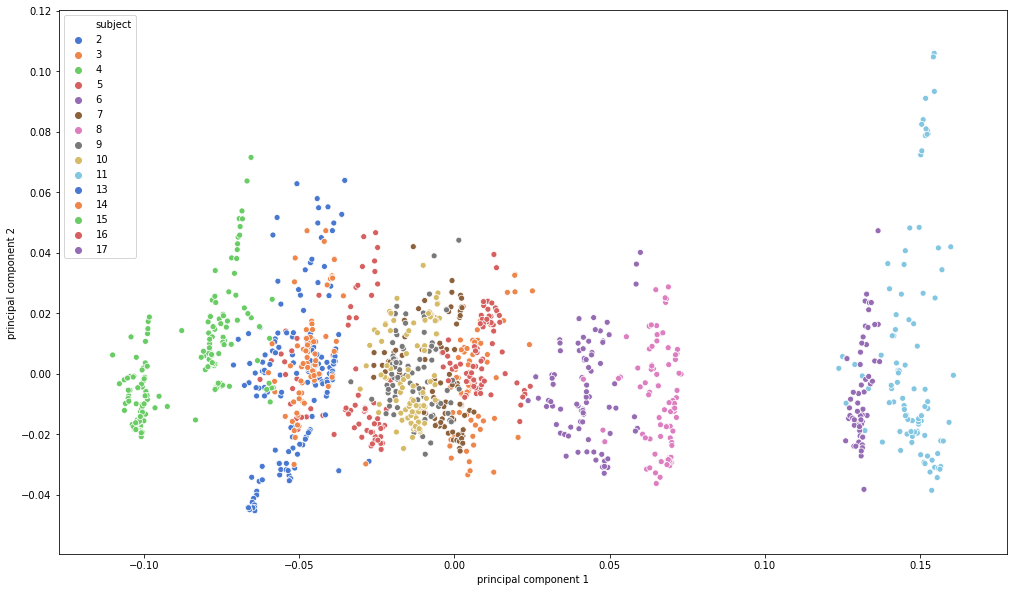

In [25]:
import seaborn
#"#a6cee3","#1f78b4","#b2df8a","#33a02c","#fb9a99","#e31a1c","#fdbf6f","#ff7f00","#cab2d6","#6a3d9a","#ffff99","#b15928",
#flatui = ["#a6cee3","#1f78b4","#b2df8a","#33a02c","#fb9a99","#e31a1c","#fdbf6f","#ff7f00","#cab2d6","#6a3d9a","#ffff99","#b15928","#9b59b6", "#3498db", "#95a5a6"]
#cmap=seaborn.set_palette(flatui,15)
cmap = seaborn.color_palette("muted", 15)
seaborn.scatterplot(x='principal component 1', y='principal component 2', hue='subject', data=principalDf,
                     palette=cmap,)

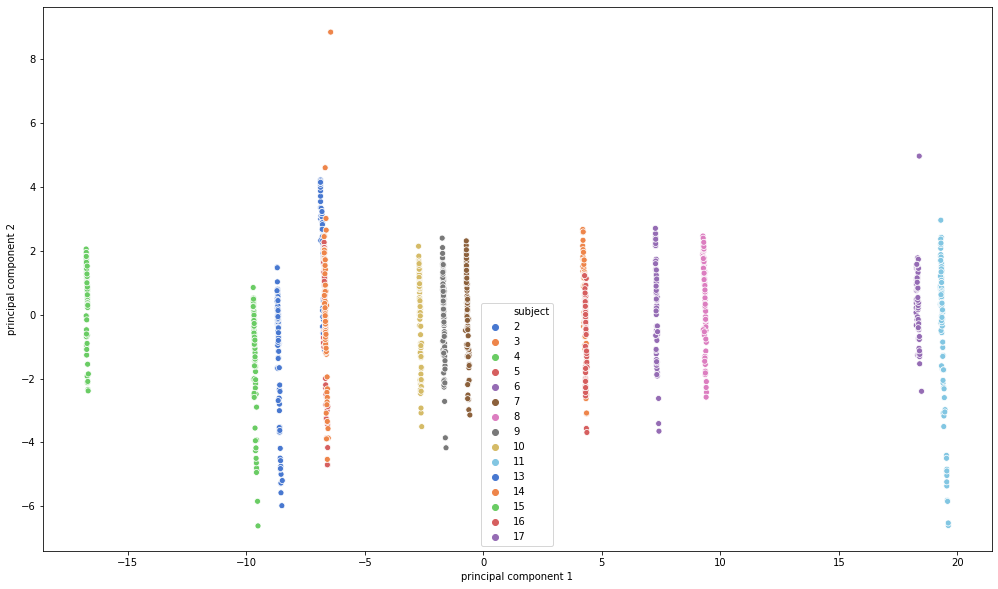

In [181]:
cmap = seaborn.color_palette("muted", 15)
seaborn.scatterplot(x='principal component 1', y='principal component 2', hue='subject', data=principalDf,
                     palette=cmap,)

In [115]:
#fig = plt.figure(figsize=(8, 6))
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
ax = Axes3D(fig)
#ax = fig.add_subplot(111, projection='3d')     
#ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'], principalDf['principal component 3'], s=50, alpha=0.6, edgecolors='w')
cset = ax.contour(principalDf['principal component 1'], principalDf['principal component 2'], principalDf['principal component 3'], 16, extend3d=True)
plt.show()

TypeError: Input z must be a 2D array.

In [27]:
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#df = px.data.iris()
fig = px.scatter_3d(principalDf,x='principal component 1', y='principal component 2', z='principal component 3',color='subject')
fig.show()

In [ ]:
import plotly.graph_objects as go
t = np.linspace(0, 20, 100)
x, y, z = principalDf['principal component 1']

fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        color=z,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [123]:
plot.scatter_3d(principalDf,x='principal component 1', y='principal component 2', z='principal component 3')

AttributeError: 'function' object has no attribute 'scatter_3d'

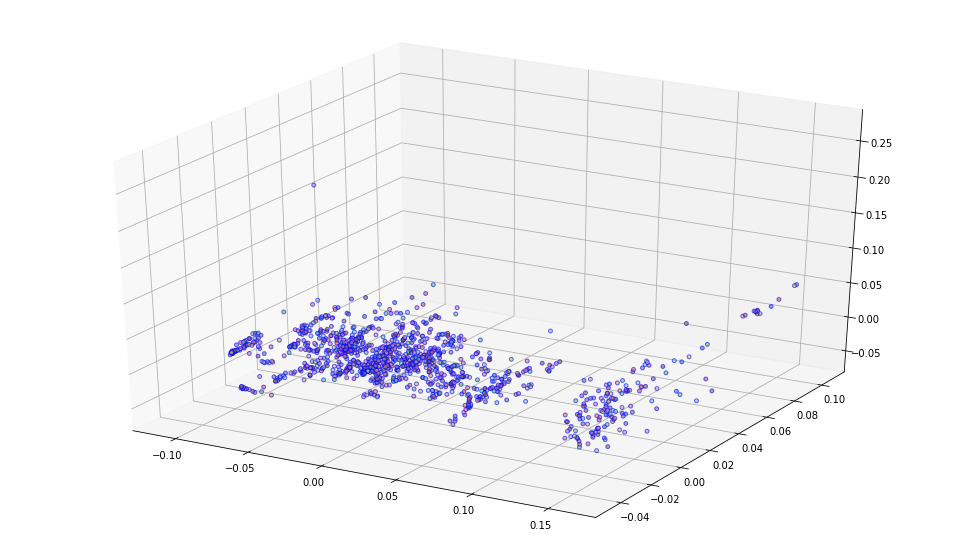

In [31]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
fig = pyplot.figure()
#ax = Axes3D(fig)
ax = fig.gca(projection='3d')
colors = seaborn.color_palette("muted",1248)
ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'], principalDf['principal component 3'], s=15, c=colors,alpha=0.6, edgecolors='b')
pyplot.show()